In [8]:
from IPython.display import HTML

HTML("""
<style>
@import url('https://fonts.googleapis.com/css2?family=Cinzel:wght@400;600;700&family=Crimson+Text:ital,wght@0,400;1,400&display=swap');

.middle-earth-container {
    text-align: center;
    background: linear-gradient(135deg, #1a1a2e 0%, #16213e 50%, #0f3460 100%);
    color: #d4af37;
    padding: 50px;
    border-radius: 12px;
    position: relative;
    overflow: hidden;
    box-shadow: 0 0 30px rgba(212, 175, 55, 0.3), inset 0 0 50px rgba(0,0,0,0.5);
}

.middle-earth-container::before {
    content: '';
    position: absolute;
    top: 0;
    left: 0;
    right: 0;
    bottom: 0;
    background: 
        radial-gradient(circle at 20% 80%, rgba(212, 175, 55, 0.1) 0%, transparent 50%),
        radial-gradient(circle at 80% 20%, rgba(212, 175, 55, 0.05) 0%, transparent 50%);
    pointer-events: none;
}

.ring-title {
    font-family: 'Cinzel', serif;
    font-size: 3.2em;
    font-weight: 700;
    margin: 0 0 20px 0;
    background: linear-gradient(45deg, #d4af37, #f4e968, #d4af37);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    background-clip: text;
    text-shadow: 0 0 20px rgba(212, 175, 55, 0.5);
    letter-spacing: 2px;
    position: relative;
    z-index: 2;
}

.elvish-subtitle {
    font-family: 'Crimson Text', serif;
    font-style: italic;
    font-size: 1.3em;
    margin: 15px 0 30px 0;
    color: #c9b037;
    opacity: 0.9;
    position: relative;
    z-index: 2;
}

.content-scroll {
    max-width: 700px;
    margin: 0 auto;
    font-family: 'Crimson Text', serif;
    font-size: 18px;
    line-height: 1.7;
    background: rgba(0, 0, 0, 0.3);
    border: 1px solid rgba(212, 175, 55, 0.3);
    border-radius: 10px;
    padding: 30px;
    position: relative;
    z-index: 2;
    backdrop-filter: blur(5px);
}

.scroll-text {
    color: #e8d5a0;
    margin-bottom: 20px;
    text-align: justify;
}

.kaggle-reference {
    color: #b8860b;
    font-size: 0.9em;
    font-style: italic;
    margin-top: 20px;
    border-top: 1px solid rgba(212, 175, 55, 0.2);
    padding-top: 15px;
}

.ring-border {
    position: absolute;
    top: 10px;
    left: 10px;
    right: 10px;
    bottom: 10px;
    border: 2px solid rgba(212, 175, 55, 0.2);
    border-radius: 8px;
    pointer-events: none;
}

.decorative-corner {
    position: absolute;
    width: 40px;
    height: 40px;
    border: 2px solid rgba(212, 175, 55, 0.4);
}

.corner-tl {
    top: 20px;
    left: 20px;
    border-right: none;
    border-bottom: none;
}

.corner-tr {
    top: 20px;
    right: 20px;
    border-left: none;
    border-bottom: none;
}

.corner-bl {
    bottom: 20px;
    left: 20px;
    border-right: none;
    border-top: none;
}

.corner-br {
    bottom: 20px;
    right: 20px;
    border-left: none;
    border-top: none;
}

@media (max-width: 768px) {
    .middle-earth-container {
        padding: 30px 20px;
    }
    
    .ring-title {
        font-size: 2.2em;
    }
    
    .content-scroll {
        padding: 20px;
        font-size: 16px;
    }
}
</style>

<div class="middle-earth-container">
    <div class="ring-border"></div>
    <div class="decorative-corner corner-tl"></div>
    <div class="decorative-corner corner-tr"></div>
    <div class="decorative-corner corner-bl"></div>
    <div class="decorative-corner corner-br"></div>
    
    <h1 class="ring-title">One Notebook to Rule Them All</h1>
    <p class="elvish-subtitle">A Journey into the Realms of Natural Language</p>
    
    <div class="content-scroll">
        <p class="scroll-text">
            In the halls of digital wisdom, where algorithms dwell and data flows like the waters of Nimrodel, 
            we embark upon a quest most noble. Here shall be envisaged the tales and tongues of Middle-earth, 
            as elated by the great loremaster Tolkien, whose words have echoed along the ages.
        </p>
        
        <p class="scroll-text">
            With the arts of Natural Language Processing, we shall delve deep into the linguistic treasures 
            of The Lord of the Rings, seeking patterns hidden within the ancient texts, as a dwarf seeks 
            mithril in the depths of Khazad-dûm.
        </p>
        
        <div class="kaggle-reference">
            <em>~ From the archives of ashishsinhaiitr, keeper of the Kaggle datasets ~</em>
        </div>
    </div>
</div>
""")

In [3]:
import kagglehub
from pathlib import Path
from pprint import pprint

In [4]:
root=Path(kagglehub.dataset_download("ashishsinhaiitr/lord-of-the-rings-text"))
print(root)

C:\Users\laran\.cache\kagglehub\datasets\ashishsinhaiitr\lord-of-the-rings-text\versions\1


In [5]:
files=sorted(p for p in root.rglob("*") if p.is_file())
pprint(files[:10])

[WindowsPath('C:/Users/laran/.cache/kagglehub/datasets/ashishsinhaiitr/lord-of-the-rings-text/versions/1/01 - The Fellowship Of The Ring.txt'),
 WindowsPath('C:/Users/laran/.cache/kagglehub/datasets/ashishsinhaiitr/lord-of-the-rings-text/versions/1/02 - The Two Towers.txt'),
 WindowsPath('C:/Users/laran/.cache/kagglehub/datasets/ashishsinhaiitr/lord-of-the-rings-text/versions/1/03 - The Return Of The King.txt')]


In [10]:
fellowship_file=files[0]

encodings_to_try = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']

for encoding in encodings_to_try:
    try:
        with open(fellowship_file, 'r', encoding=encoding) as f:
            text =f.read()
        print(f"Successufully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed with encoding: {encoding}")
        continue
else:
    print('none of th eencoding worked')



print(f"File: {fellowship_file.name}")
print(f"Character count: {len(text):,}")
print(f"Word count (approx): {len(text.split()):,}")

lines=text.split('\n')
print(f"Total lines: {len(lines)}")

failed with encoding: utf-8
Successufully read with encoding: latin-1
File: 01 - The Fellowship Of The Ring.txt
Character count: 1,021,113
Word count (approx): 187,838
Total lines: 4270


# Book 1: The fellowship of the ring 

In [40]:
import re
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
cleaned_text=re.sub(f'\s+', ' ', text.strip())
words=cleaned_text.lower().split()

clean_words=[re.sub(r'[^\w]', '', word) for word in words if re.sub(r'[^\w]', '', word)]

In [13]:
word_freq=Counter(clean_words)
print(f"Unique words: {len(word_freq)}")
print(f"Most common words: {word_freq.most_common(10)}")

Unique words: 9808
Most common words: [('the', 11703), ('and', 7548), ('of', 5081), ('to', 3946), ('a', 3717), ('he', 2985), ('in', 2957), ('it', 2712), ('i', 2691), ('that', 2491)]


In [18]:
print('Character analysis:')
print("-"*20)
characters=[ 'frodo', 'sam', 'gandalf', 'aragorn', 'legolas', 'gimli', 'boromir', 'merry', 'pippin']
character_mention={char:word_freq.get(char, 0) for char in characters}
print(f"Character mentions: {character_mention}")


Character analysis:
--------------------
Character mentions: {'frodo': 1033, 'sam': 395, 'gandalf': 446, 'aragorn': 200, 'legolas': 94, 'gimli': 116, 'boromir': 148, 'merry': 219, 'pippin': 208}


# Sentiment analysis

Two models: textblob vs Vader.  
**TextBlob** handles complex sentences well and could be potentially of use for the long sentences in the lord of the rings.  
**Vader** was built in for social media and could be a cons in analysing the long sentences of the book, it can handle though more nuanced emotions. 

In [22]:
def create_word_chunks(text, chunk_size=500):
    words=text.split()
    chunks=[]

    for i in range(0, len(words), chunk_size):
        chunk= ' '.join(words[i:i + chunk_size])
        chunks.append(chunk)

    return chunks

In [25]:
chunks=create_word_chunks(text, 500)
print(f"created {len(chunks)} of ~500 words")
print("First chunk preview")
print("-"*20)
print(f"{chunks[0][:200]} ...")

created 376 of ~500 words
First chunk preview
--------------------
Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Nine for Mortal Men doomed to die, One for the Dark Lord on his dark throne In the Land of Mordor wher ...


In [32]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

In [28]:
text_chunk = chunks[0]  # first chunk 

blob=TextBlob(text_chunk)
print("TextBlob results:")
print(f"Polarity: {blob.sentiment.polarity:.3f} (-1 = negative, 1=positive)")
print(f"Subjectivity: {blob.sentiment.subjectivity:.3f} (0=objective, 1=subjective)")

TextBlob results:
Polarity: 0.171 (-1 = negative, 1=positive)
Subjectivity: 0.438 (0=objective, 1=subjective)


In [29]:
analyzer=SentimentIntensityAnalyzer()
vader_scores = analyzer.polarity_scores(text_chunk)
print(f"\nVADER results: {vader_scores}")


VADER results: {'neg': 0.063, 'neu': 0.849, 'pos': 0.088, 'compound': 0.9161}


Both tools seems to suggest the narrative of the first chunk is relatively positive.  
Vader seems to interpret it as more positive than TextBlob.

In [30]:
text_indices=[50, 150, 300]

for i in text_indices:
    print(f"\n--- Chunk {i} ---")
    blob = TextBlob(chunks[i])
    vader_scores=analyzer.polarity_scores(chunks[i])

    print(f"TextBlob: {blob.sentiment.polarity:.3f}")
    print(f"VADER: {vader_scores['compound']:.3f}")


--- Chunk 50 ---
TextBlob: 0.076
VADER: 0.952

--- Chunk 150 ---
TextBlob: 0.118
VADER: -0.927

--- Chunk 300 ---
TextBlob: 0.106
VADER: -0.965


## TextBlob

In [42]:
sentiment_blob=[]

for i, chunk in enumerate(chunks):
    if i % 50 == 0:
        print(f"Processing chunk {i}/ {len(chunks)}")

    blob= TextBlob(chunk)
    sentiment_blob.append(blob.sentiment.polarity)

print(f"Sentiment analysis complete! Range: {min(sentiment_blob):.3f} to {max(sentiment_blob):.3f}")

Processing chunk 0/ 376
Processing chunk 50/ 376
Processing chunk 100/ 376
Processing chunk 150/ 376
Processing chunk 200/ 376
Processing chunk 250/ 376
Processing chunk 300/ 376
Processing chunk 350/ 376
Sentiment analysis complete! Range: -0.143 to 0.293


# VADER

In [39]:
sentiment_vader = []

for i, chunk in enumerate(chunks):
    if i % 50 == 0:
        print(f"Processing chunk {i} / {len(chunks)}")

    vader_scores=analyzer.polarity_scores(chunk)
    sentiment_vader.append(vader_scores['compound'])

print(f"VADER analysis complete! Range: {min(sentiment_vader):.3f} to {max(sentiment_vader):.3f}")

Processing chunk 0 / 376
Processing chunk 50 / 376
Processing chunk 100 / 376
Processing chunk 150 / 376
Processing chunk 200 / 376
Processing chunk 250 / 376
Processing chunk 300 / 376
Processing chunk 350 / 376
VADER analysis complete! Range: -0.997 to 0.999


# Sentiment map: TextBlob and Vader

VADER score is jumping a lot, we will smooth it each 10 scoress. 

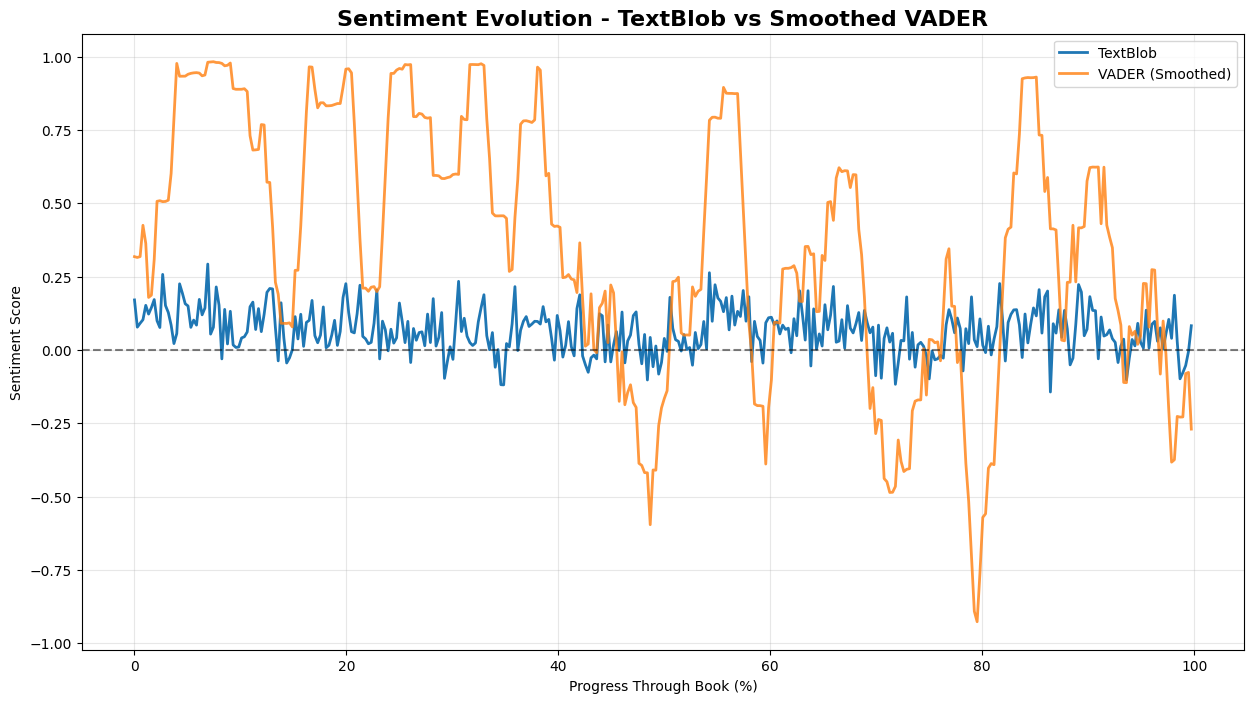

In [ ]:
from scipy.ndimage import uniform_filter1d  

smooth_window = 10
sentiments_vader_smooth = uniform_filter1d(sentiment_vader, size=smooth_window)

plt.figure(figsize=(15, 8))
plt.plot(chunk_positions, sentiment_blob, label='TextBlob', linewidth=2)
plt.plot(chunk_positions, sentiments_vader_smooth, label='VADER (Smoothed)', linewidth=2, alpha=0.8)

plt.title('Sentiment Evolution - TextBlob vs Smoothed VADER', fontsize=16, fontweight='bold')
plt.xlabel('Progress Through Book (%)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.show()

# Sentiment analysis by chapter

In [59]:
def split_into_chapters(text):
    lines = text.split('\n')
    
    chapters = []
    current_chapter = []
    chapter_info = []  
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        
        chapter_match = re.match(r'_Chapter\s+(\d+)_', line)
        
        if chapter_match:
            if current_chapter:
                chapters.append('\n'.join(current_chapter))

            chapter_marker = line
            actual_title = ""

            for j in range(i + 1, min(i + 5, len(lines))):
                if lines[j].strip():
                    actual_title = lines[j].strip()
                    break
            
            chapter_info.append((chapter_marker, actual_title))
            current_chapter = []
        else:
            current_chapter.append(lines[i])
        
        i += 1

    if current_chapter:
        chapters.append('\n'.join(current_chapter))
    
    return chapters, chapter_info


In [60]:
chapters, chapter_info = split_into_chapters(text)

print(f"Found {len(chapters)} chapters:")
print("Prologue" if len(chapters) > len(chapter_info) else "No prologue detected")

for i, (marker, title) in enumerate(chapter_info):
    print(f"{i+1}. {marker} - '{title}'")

Found 23 chapters:
Prologue
1. _Chapter 1_ - 'A Long-expected Party'
2. _Chapter 2_ - 'The Shadow of the Past'
3. _Chapter 3_ - 'Three is Company'
4. _Chapter 4_ - 'A Short Cut to Mushrooms'
5. _Chapter 5_ - 'A Conspiracy Unmasked'
6. _Chapter 6_ - 'The Old Forest'
7. _Chapter 7_ - 'In the House of Tom Bombadil'
8. _Chapter 8_ - 'Fog on the Barrow-Downs'
9. _Chapter 9_ - 'At the Sign of'
10. _Chapter 10_ - 'Strider'
11. _Chapter 11_ - 'A Knife in the Dark'
12. _Chapter 12_ - 'Flight to the Ford'
13. _Chapter 1_ - 'Many Meetings'
14. _Chapter 2_ - 'The Council of Elrond'
15. _Chapter 3_ - 'The Ring Goes South'
16. _Chapter 4_ - 'A Journey in the Dark'
17. _Chapter 5_ - 'The Bridge of Khazad-dûm'
18. _Chapter 6_ - 'Lothlórien'
19. _Chapter 7_ - 'The Mirror of Galadriel'
20. _Chapter 8_ - 'Farewell to Lórien'
21. _Chapter 9_ - 'The Great River'
22. _Chapter 10_ - 'The Breaking of the Fellowship'


In [70]:
#chapters

In [63]:
sentiment_blob=[]

for i, chapter in enumerate(chapters):
    if i % 5 == 0:
        print(f"Processing chunk {i}/ {len(chapters)}")

    blob= TextBlob(chapter)
    sentiment_blob.append(blob.sentiment.polarity)

print(f"Blob analysis complete! Range: {min(sentiment_blob):.3f} to {max(sentiment_blob):.3f}")

sentiment_vader = []

for i, chapter in enumerate(chapters):
    if i % 5 == 0:
        print(f"Processing chunk {i} / {len(chapters)}")

    vader_scores=analyzer.polarity_scores(chapter)
    sentiment_vader.append(vader_scores['compound'])

print(f"VADER analysis complete! Range: {min(sentiment_vader):.3f} to {max(sentiment_vader):.3f}")


Processing chunk 0/ 23
Processing chunk 5/ 23
Processing chunk 10/ 23
Processing chunk 15/ 23
Processing chunk 20/ 23
Blob analysis complete! Range: 0.010 to 0.131
Processing chunk 0 / 23
Processing chunk 5 / 23
Processing chunk 10 / 23
Processing chunk 15 / 23
Processing chunk 20 / 23
VADER analysis complete! Range: -1.000 to 1.000


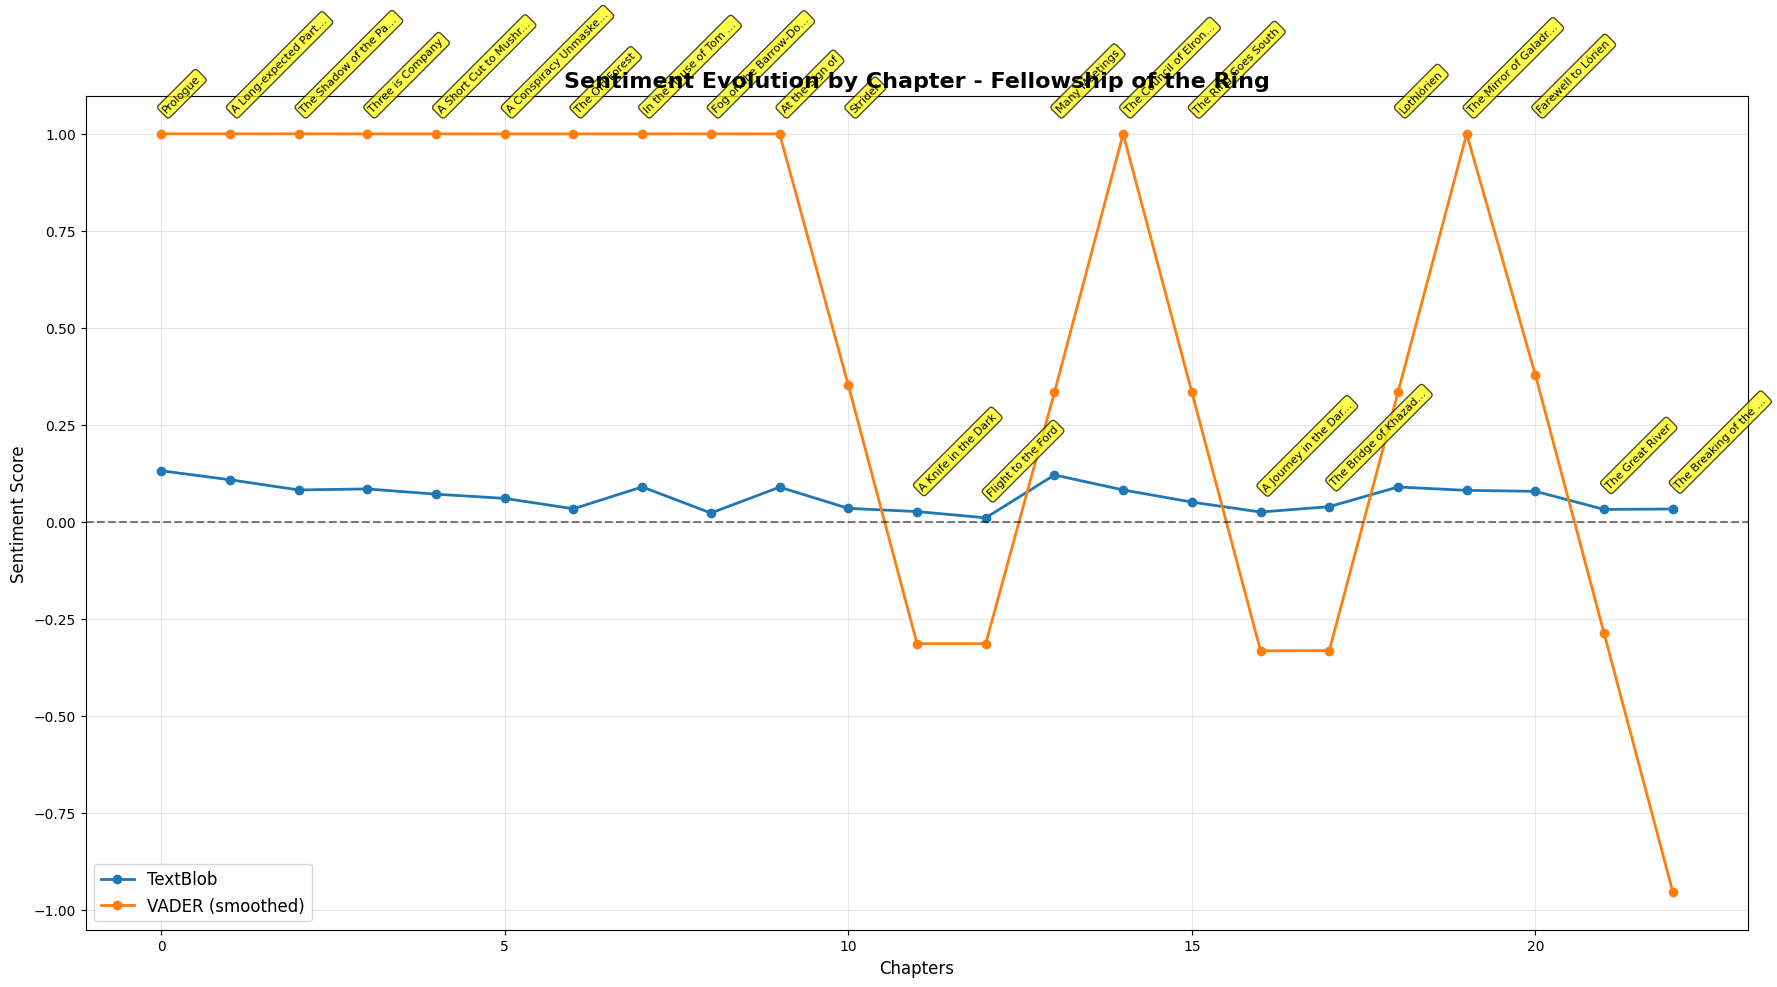

In [69]:
from scipy.ndimage import uniform_filter1d  

smooth_window = 3
sentiments_vader_smooth = uniform_filter1d(sentiment_vader, size=smooth_window)

chapter_names = ["Prologue"] + [info[1] for info in chapter_info]
x_positions = range(len(sentiment_blob))

fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(x_positions, sentiment_blob, 'o-', label='TextBlob', linewidth=2, markersize=6)
ax.plot(x_positions, sentiments_vader_smooth, 'o-', label='VADER (smoothed)', linewidth=2, markersize=6)


for i, (x, y_tb, y_vader, title) in enumerate(zip(x_positions, sentiment_blob, sentiment_vader, chapter_names)):
    y_label = max(y_tb, y_vader) + 0.05
    
    short_title = title[:20] + "..." if len(title) > 20 else title
    
    ax.annotate(short_title, (x, y_label), 
                rotation=45, fontsize=8, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.set_title('Sentiment Evolution by Chapter - Fellowship of the Ring', fontsize=16, fontweight='bold')
ax.set_xlabel('Chapters', fontsize=12)
ax.set_ylabel('Sentiment Score', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

VADER seems to represent better the evolution of the emotions through the book. Moment such as the Bridge of Khazar-Dum and the Breaking of the fellowship are characterized by negative emotions while moments like the formation of the fellowship and the relaxing time in the Shire at the beginning are defined as positive.  

Despite this analysis it's not too bad it would be interesting to see the evolution of the emotions in terms of "human emotions" instead of ranking between -1 and +1.  
In order to do it we can apply different tools: NRCLex, Text2Emotions, RoBERTa

# Analysis in terms of human emotions